<a href="https://colab.research.google.com/github/blkbamboo74/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Dennis_Batiste_DS_Unit_1_Sprint_Challenge_1_0919.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 0 - Revert your version of Pandas right from the start
I don't want any of you to get stuck because of Pandas bugs, so right from the get-go revert back to version `0.23.4`
- Run the cell below
- Then restart your runtime. Go to `Runtime`  ->  `Restart runtime...` in the top menu (or click the "RESTART RUNTIME" button that shows up in the output of the cell below).


In [5]:
!pip install pandas==0.23.4

     |████████████████████████████████| 8.9MB 2.8MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [10]:
import pandas as pd

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data')

df.isna().sum()

headers = ['age', 'year_of_op', 'nodes_detected', 'survived']

df.columns = headers

df.describe ()



,age,year_of_op,nodes_detected,survived
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [4]:
#The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)



df[headers[3]].replace(to_replace=2, value=0, inplace=True)

df[headers[3]].head()


0    1
1    1
2    1
3    1
4    1
Name: survived, dtype: int64

## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [5]:
# TODO
df.describe()

,age,year_of_op,nodes_detected,survived
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,0.734426
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


(array([15., 27., 46., 53., 55., 41., 41., 18.,  7.,  2.]),
 array([30. , 35.3, 40.6, 45.9, 51.2, 56.5, 61.8, 67.1, 72.4, 77.7, 83. ]),
 <a list of 10 Patch objects>)

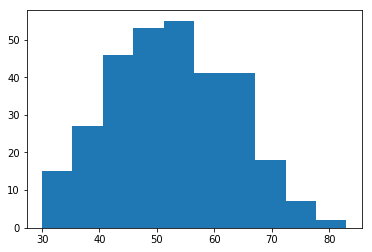

In [7]:
import matplotlib.pyplot as plt
plt.hist(df['age'])

(array([63., 28., 26., 23., 30., 30., 28., 28., 25., 24.]),
 array([58. , 59.1, 60.2, 61.3, 62.4, 63.5, 64.6, 65.7, 66.8, 67.9, 69. ]),
 <a list of 10 Patch objects>)

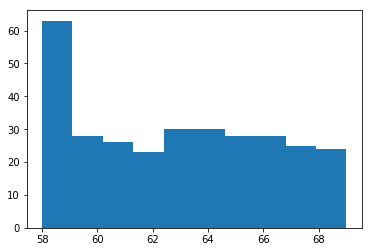

In [8]:
plt.hist(df['year_of_op'])

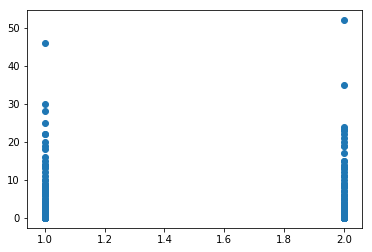

In [12]:
plt.scatter(df['survived'], df['nodes_detected'])

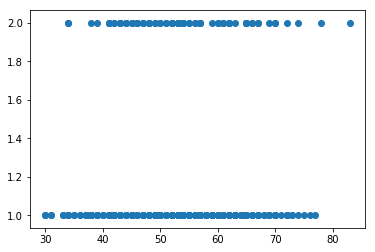

In [13]:
plt.scatter(df['age'], df['survived'])

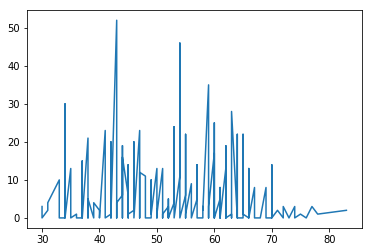

In [33]:
plt.plot(df['age'], df['nodes_detected'])

In [0]:
year_of_op_bin = pd.cut(df['year_of_op'], bins=[0, 58, 61, 63, 65, 69])
age_bin = pd.cut(df['age'], bins=[0, 30, 35, 41,42,43, 44,45,46, 51,54, 57, 62, 67, 73, 78, 83])
nodes_detected_bin = pd.cut(df['nodes_detected'], 5)


In [27]:
pd.crosstab(df['survived'],  'year_of_op', normalize='columns')

col_0,year_of_op
survived,
1,0.734426
2,0.265574


In [17]:
pd.crosstab(df['survived'], df['year_of_op'], normalize='columns')

year_of_op,58,59,60,61,62,63,64,65,66,67,68,69
survived,,,,,,,,,,,,
1,0.666667,0.666667,0.857143,0.884615,0.695652,0.733333,0.733333,0.535714,0.785714,0.84,0.769231,0.636364
2,0.333333,0.333333,0.142857,0.115385,0.304348,0.266667,0.266667,0.464286,0.214286,0.16,0.230769,0.363636


## Part 3 - DataFrame Filtering

Use DataFrame filtering to subset the data into two smaller dataframes. You should make one dataframe for individuals who survived >5 years and a second dataframe for individuals who did not. 

Create a graph with each of the dataframes (can be the same graph type) to show the differences in Age and Number of Positive Axillary Nodes Detected between the two groups.

In [0]:
# TODO I need to convert the survided data into a interger and then use the data from that to continue.  But it's late and Im running out of time.
def Survival_Rate (x):
  if x == '1':
    return 1
  if x == '0':
    return 0 

In [31]:
df ['survived_totals'] = df['survived'].apply (Survial_Rate)
df

NameError: ignored

## Part 4 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival? (As that feature goes up in value rate of survival increases)
- What is at least one feature that looks to have a negative relationship with survival? (As that feature goes down in value rate of survival increases)
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

Your Text Answer Here

In [0]:
# Any Supplemental Code for Analysis Here

I wish I had more time to go through the data more throughly. From what I have it shows that the younger patients that get treatment survive longer.  
Older patients that do not seek treatment fail to survive.

I wish I had more time to go through the data more throughly. From what I have it shows that the younger patients that get treatment survive longer.  
Older patients that do not seek treatment fail to survive.